In [1]:
### Implementation of k-means algorithm
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [4]:
### This optimizes over the choices of the vectors mu_i
def opt_reps(X, k, assign):
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

In [5]:
### This optimizes over the choices of the clusters C_j
def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign


In [6]:
from numpy.random import default_rng
rng = default_rng(535)

In [7]:
def mmids_kmeans(X, k, maxiter=10):
    (n, d) = X.shape
    assign = rng.integers(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    for iter in range(maxiter):
        # Step 1: Optimal representatives for fixed clusters
        reps = opt_reps(X, k, assign)
        # Step 2: Optimal clusters for fixed representatives
        assign = opt_clust(X, k, reps)
    return assign


162.7
74.8611111111111
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334


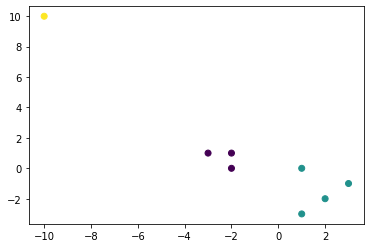

In [11]:
X = np.array([[1., 0.],[-2., 0.],[-2.,1.],[1.,-3.],[-10.,10.],[2.,-2.],[-3.,1.],[3.,-1.]])
assign = mmids_kmeans(X,3)
plt.scatter(X[:,0],X[:,1], c = assign)
plt.show()

In [12]:
opt_reps(X, 3, assign)


array([[ -2.33333333,   0.66666667],
       [  1.75      ,  -1.5       ],
       [-10.        ,  10.        ]])

In [13]:
import pandas as pd

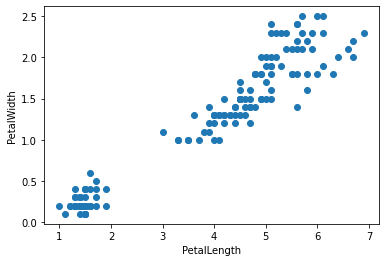

In [17]:
df = pd.read_csv("./datasets/iris-measurements.csv")
X = df[['PetalLengthCm', 'PetalWidthCm', 
        'SepalLengthCm', 'SepalWidthCm']].to_numpy()
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()


520.8744341625012
97.77890694968772
87.00356562736205
84.80172984452898
84.10217888865151
83.13638186876976
81.83900206772623
80.89577600000003
79.96297983461305
79.43376414532673


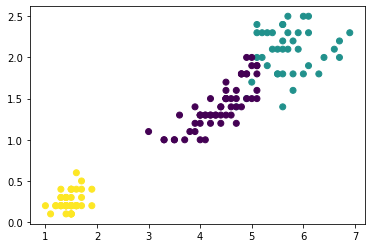

In [37]:
assign = mmids_kmeans(X, 3)
plt.scatter(X[:,0], X[:,1], c=assign)
plt.show()


In [38]:
df_truth = pd.read_csv("./datasets/iris-species.csv")
df_truth.head()

,Id,Species
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa
3,4,Iris-setosa
4,5,Iris-setosa


In [39]:
species = df_truth['Species']
species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

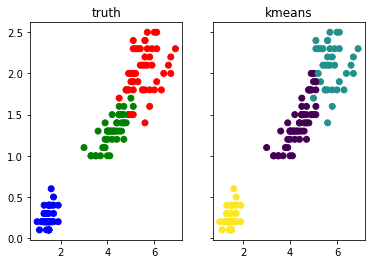

In [40]:
species2color = {'Iris-setosa': 'b', 'Iris-versicolor': 'g', 'Iris-virginica': 'r'}
truth = species.replace(species2color)
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(X[:,0], X[:,1], c=truth)
ax1.set_title('truth')
ax2.scatter(X[:,0], X[:,1], c=assign)
ax2.set_title('kmeans')
plt.show()
